In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set() # 設定seaborn 樣式

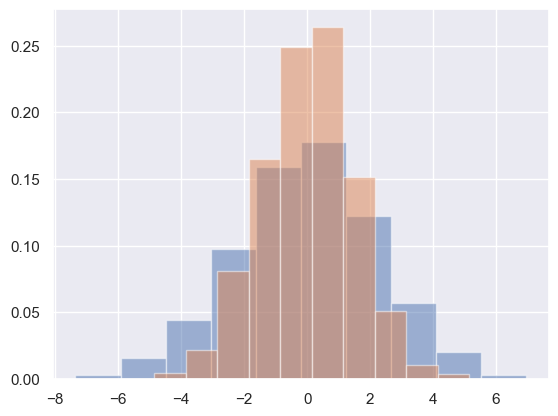

In [3]:
# matplotlib 的直方圖畫法
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy': # python中字串會分別進行迭代
    plt.hist(data[col], density=True, alpha=0.5)

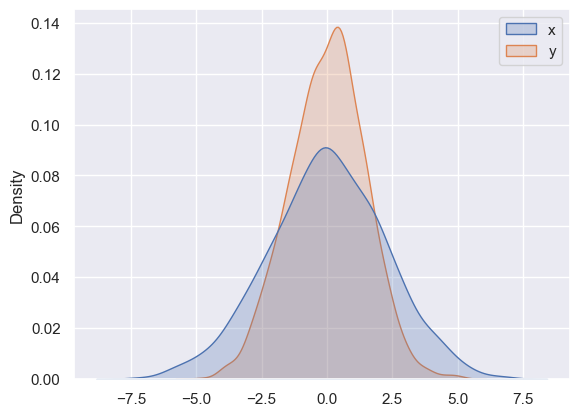

In [4]:
# Seaborn 可以用簡單的方法得到核密度估計
sns.kdeplot(data=data, fill=True);

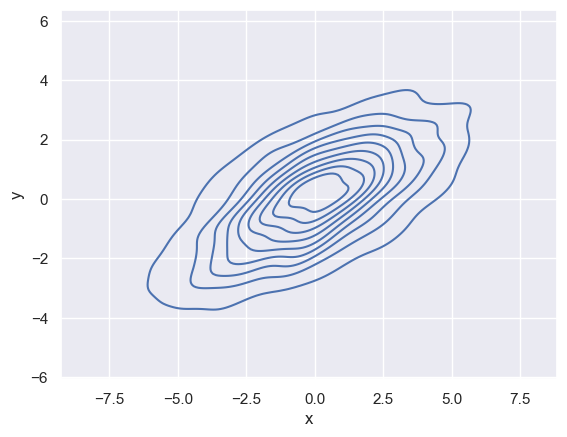

In [5]:
# 二維的KDE圖表
sns.kdeplot(data=data, x='x', y='y');

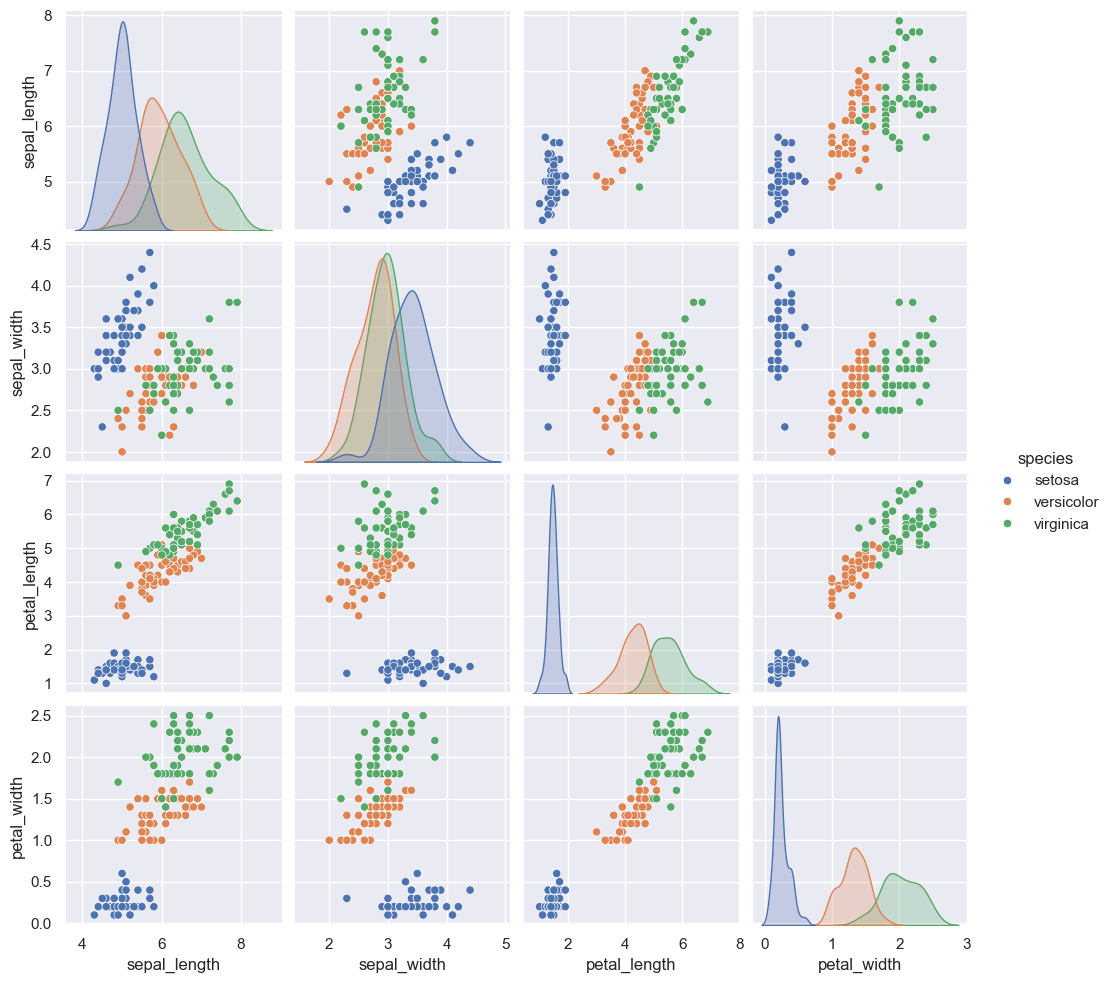

In [6]:
# 載入Iris 資料集
iris = sns.load_dataset("iris")

# 視覺化多維度關係 只需要呼叫 sns.pairplot
sns.pairplot(iris, hue="species", height=2.5);

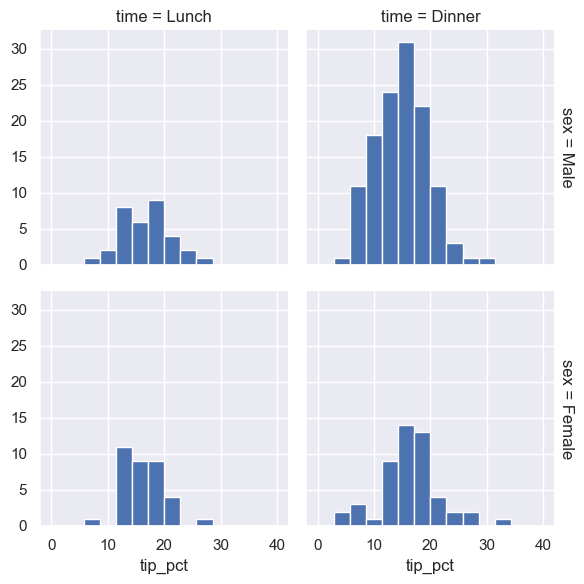

In [7]:
# 展現不同指標的直方圖 只需要使用 sns.FacetGrid
tips = sns.load_dataset('tips')

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15));

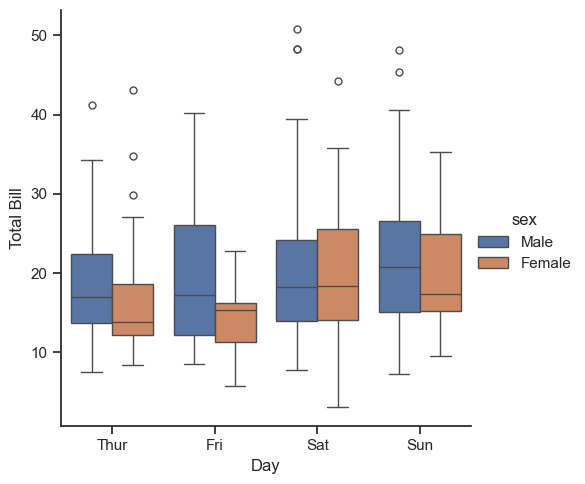

In [ ]:
# 盒鬚圖使用 sns.catplot(kind='box')
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='day', y='total_bill', hue='sex',
                    data=tips, kind='box')
    g.set_axis_labels("Day", "Total Bill");

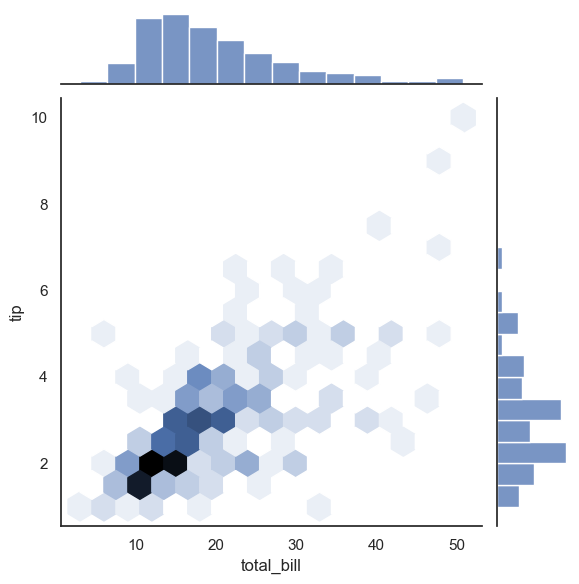

In [9]:
# 展示聯合分佈 使用 sns.jointplot
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

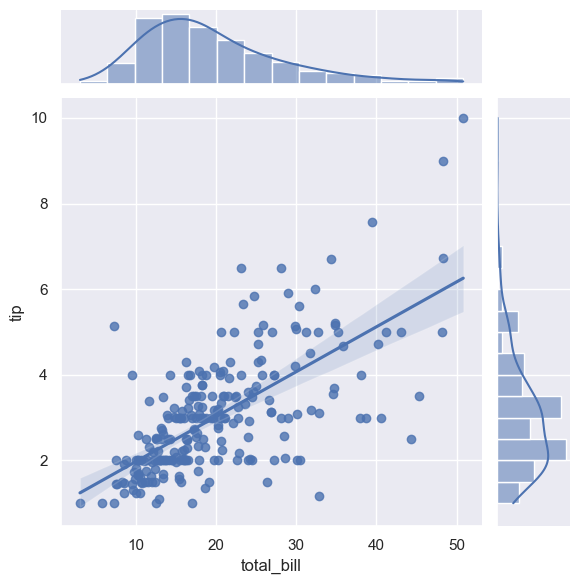

In [11]:
# 還可以執行自動核密度估計以及迴歸
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

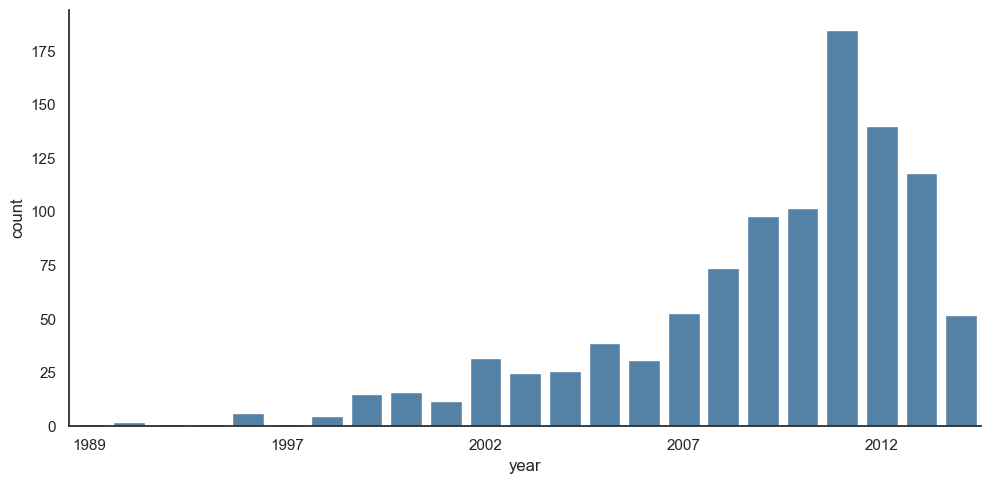

In [ ]:
planets = sns.load_dataset('planets')

# 直方圖可以當作長條圖的特例
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=2,
                    kind='count', color='steelblue')
    g.set_xticklabels(step=5)

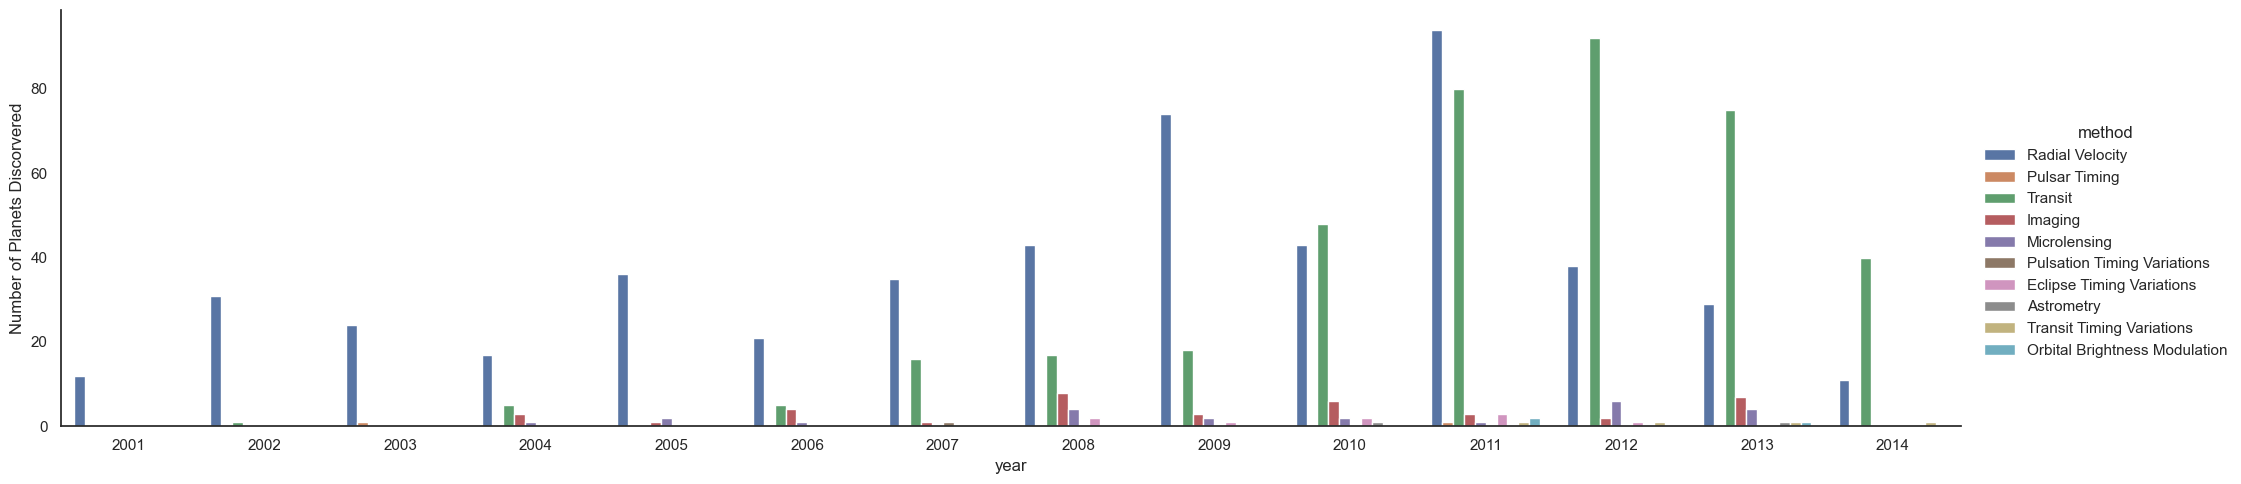

In [ ]:
# 展示時間序列可以使用 sns.factorplot
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015)) # aspect = width / height
    g.set_ylabels('Number of Planets Discorvered')